# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv
from numpy.linalg import eigvals
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

## Preparation: load in the data we need for this assignment.

In [2]:
model=np.load('data_4_assignment1/reference_model.npy') # Reference model
cov=np.load('data_4_assignment1/covariance.npy') # Analytical ('true') covariance matrix

## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [3]:
noisy_data_set1 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)
noisy_data_set2 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)

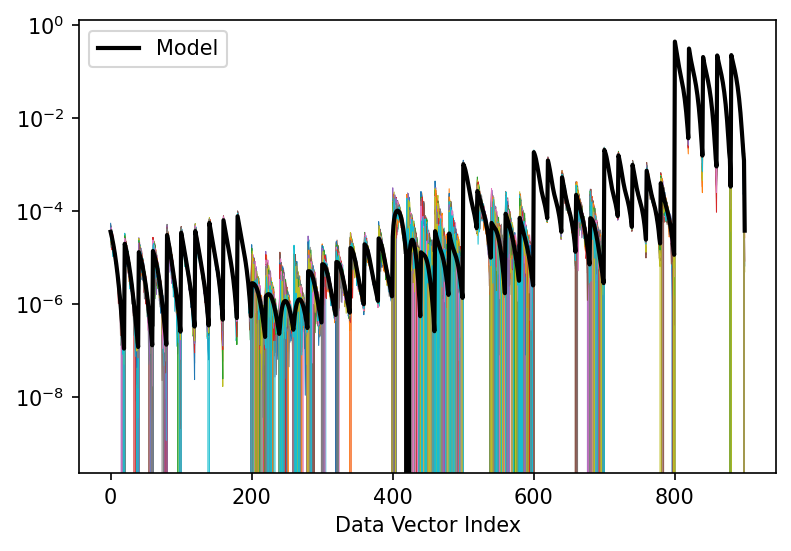

In [4]:
# We plot several realizations of the noisy data vector to show that it scatters around the truth
fig, ax = plt.subplots(dpi=150)
for i in range(100):
    ax.plot(noisy_data_set1[i], linewidth=0.5)
ax.plot(model, linewidth=2, color='black', label='Model')
ax.set_xlabel('Data Vector Index')
ax.set_yscale('log')
ax.legend()

## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

The mean of the sample is:  899.9
The variance of the sample is:  1792.1


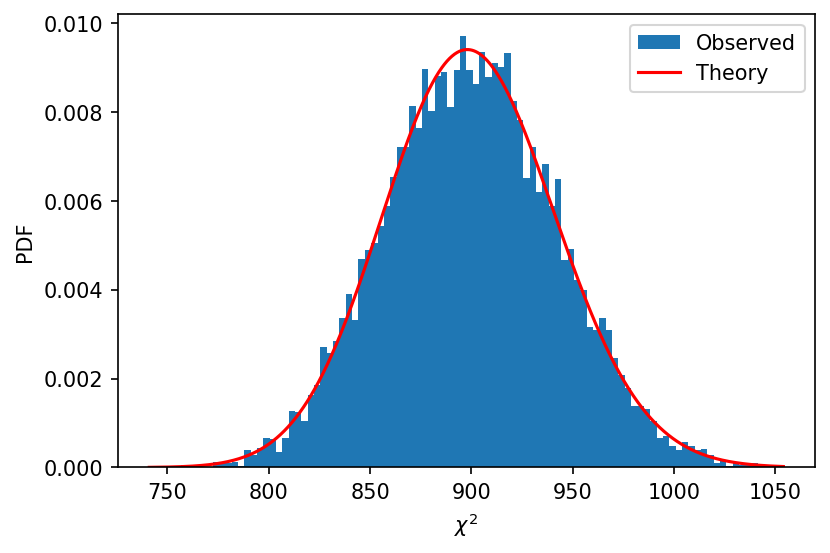

In [5]:
inv_cov = inv(cov)
chi2 = []
# We compute chi^2 for all data vectors in set 1
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T # Column vector of data minus model
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0]) # Matrix multiplication

# We check if the distribution is correct by plotting a histogram of the chi-squared values and overlaying
# the predicted distribution (for 900 degrees of freedom).
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
x_plot = np.linspace(np.min(chi2), np.max(chi2), 1000)
y_plot = chi2_scp.pdf(x_plot, 900)
ax.plot(x_plot, y_plot, '-', color='red', label='Theory')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()

# The mean and variance of a chi-squared distribution are equal to one and two times the degrees of freedom 
# respectively; since there are 900 degrees of freedom, we should find a mean and variance close 900 and 1800.
print('The mean of the sample is: ', round(np.mean(chi2), 1))
print('The variance of the sample is: ', round(np.var(chi2), 1))

### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [6]:
# We calculate the covariance matrices for each of the four scenarios
cov_num500 = np.cov(noisy_data_set2[:500].T)
cov_num1000 = np.cov(noisy_data_set2[:1000].T)
cov_num5000 = np.cov(noisy_data_set2[:5000].T)
cov_num10000 = np.cov(noisy_data_set2[:10000].T)

All eigenvalues positive for 500 realizations covariance matrix:  False
All eigenvalues positive for 1000 realizations covariance matrix:  True
All eigenvalues positive for 5000 realizations covariance matrix:  True
All eigenvalues positive for 10000 realizations covariance matrix:  True


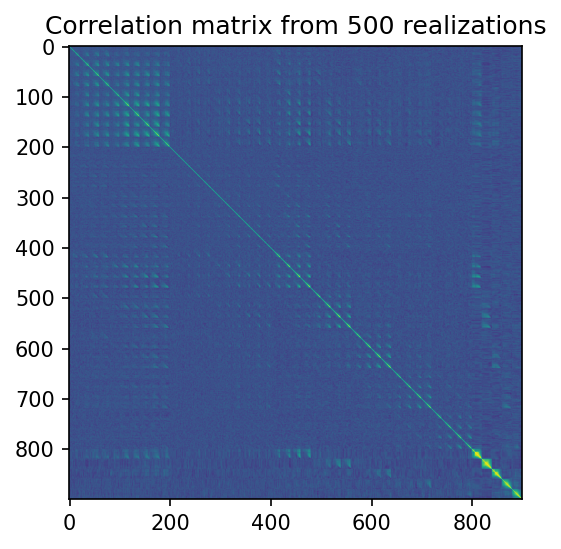

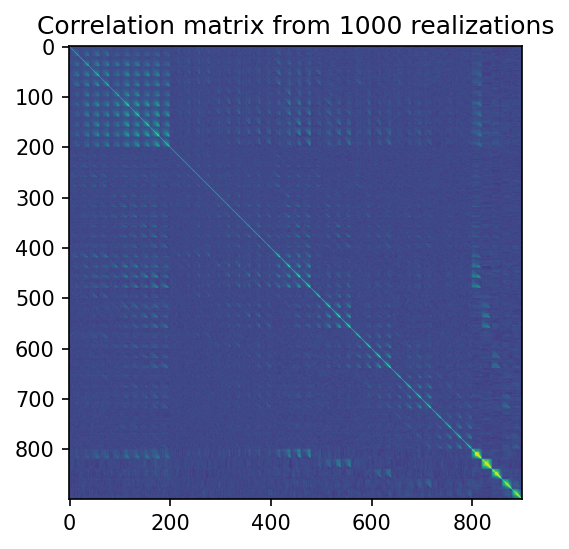

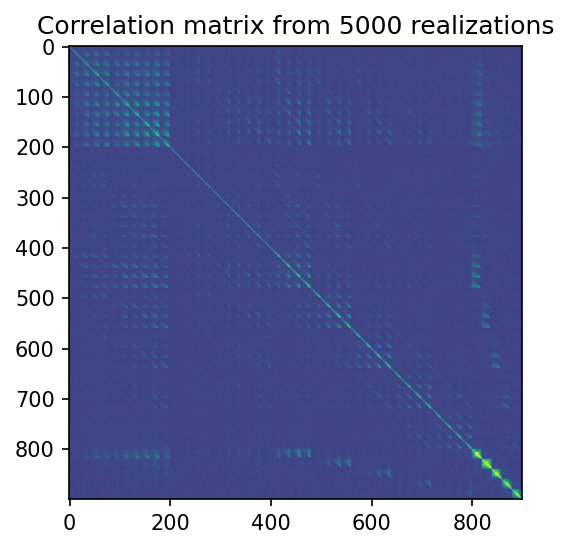

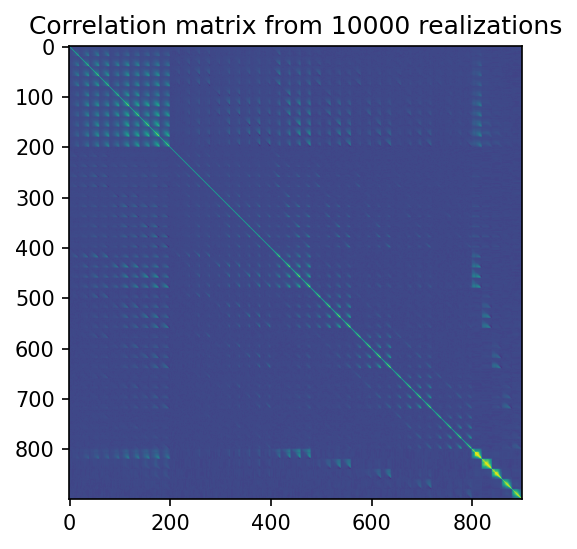

In [7]:
# We plot the correlation (normalized covariance) matrices for each of the four scenarios, and check if their
# eigenvalues are strictly non-negative to determine if they are positive semi-definite
corr_num500 = np.corrcoef(noisy_data_set2[:500].T)
corr_num1000 = np.corrcoef(noisy_data_set2[:1000].T)
corr_num5000 = np.corrcoef(noisy_data_set2[:5000].T)
corr_num10000 = np.corrcoef(noisy_data_set2[:10000].T)
fig, ax = plt.subplots(dpi=150)
ax.imshow(corr_num500)
ax.set_title('Correlation matrix from 500 realizations')
fig, ax = plt.subplots(dpi=150)
ax.imshow(corr_num1000)
ax.set_title('Correlation matrix from 1000 realizations')
fig, ax = plt.subplots(dpi=150)
ax.imshow(corr_num5000)
ax.set_title('Correlation matrix from 5000 realizations')
fig, ax = plt.subplots(dpi=150)
ax.imshow(corr_num10000)
ax.set_title('Correlation matrix from 10000 realizations')

# Whether the covariance matrix is positive semi-definite is based on whether the eigenvalues are strictly 
# non-negative (this is true for the covariance matrices with 1000, 5000 and 10000 realizations but not 500)
print('All eigenvalues positive for 500 realizations covariance matrix: ', 
      np.all(np.linalg.eigvals(cov_num500) >= 0))
print('All eigenvalues positive for 1000 realizations covariance matrix: ', 
      np.all(np.linalg.eigvals(cov_num1000) >= 0)) 
print('All eigenvalues positive for 5000 realizations covariance matrix: ', 
      np.all(np.linalg.eigvals(cov_num5000) >= 0)) 
print('All eigenvalues positive for 10000 realizations covariance matrix: ', 
      np.all(np.linalg.eigvals(cov_num10000) >= 0))


### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

Mean of chi-squared values using covariance with 500 realizations is:  2527033479883230.0
Variance of chi-squared values using covariance with 500 realizations is:  1.3367869545646677e+34 

Mean of chi-squared values using covariance with 1000 realizations is:  9116.9
Variance of chi-squared values using covariance with 1000 realizations is:  1990438.8 

Mean of chi-squared values using covariance with 5000 realizations is:  1097.3
Variance of chi-squared values using covariance with 5000 realizations is:  3236.8 

Mean of chi-squared values using covariance with 10000 realizations is:  988.7
Variance of chi-squared values using covariance with 10000 realizations is:  2359.9


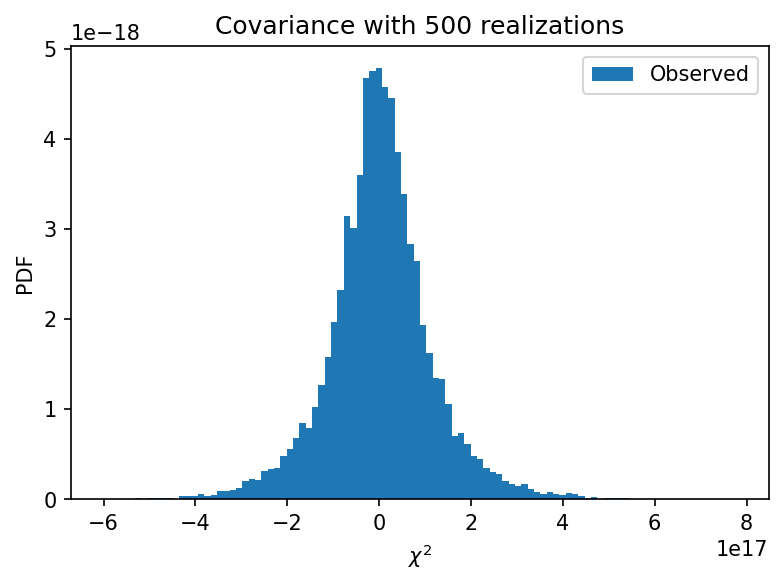

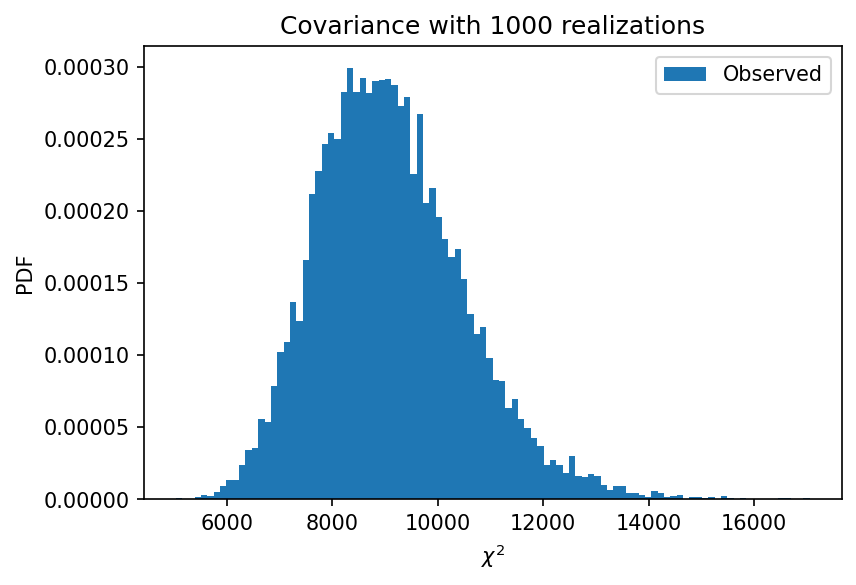

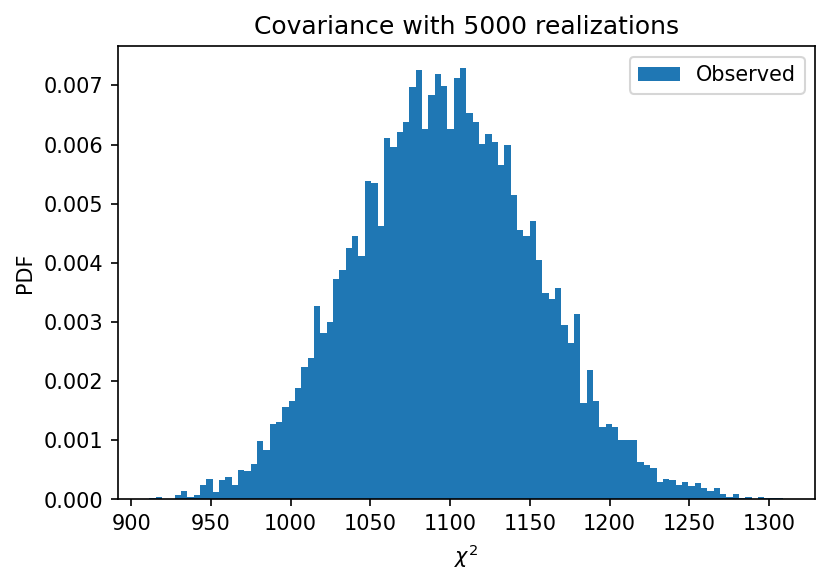

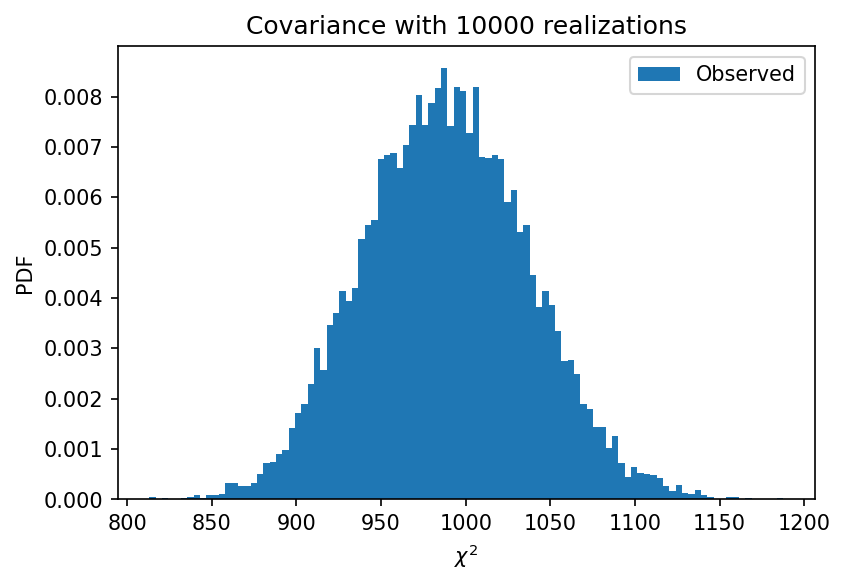

In [8]:
# We compute the chi-squared distribution for all four scenarios

inv_cov = inv(cov_num500)
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Covariance with 500 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 500 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 500 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num1000)
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Covariance with 1000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num5000)
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Covariance with 5000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num10000)
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Covariance with 10000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.var(chi2), 1))

# We notice that in all four scenarios we obtain means and variances that deviate from their expected values, 
# indicating there is some bias in our measurements of the chi-squared values; we can also see visually that the 
# observed chi-squared histograms are not located near the expected around 900.

### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

Mean of chi-squared values using covariance with 500 realizations is:  -2035806530887892.8
Variance of chi-squared values using covariance with 500 realizations is:  8.67587355092825e+33 

Mean of chi-squared values using covariance with 1000 realizations is:  894.4
Variance of chi-squared values using covariance with 1000 realizations is:  19154.5 

Mean of chi-squared values using covariance with 5000 realizations is:  899.6
Variance of chi-squared values using covariance with 5000 realizations is:  2175.2 

Mean of chi-squared values using covariance with 10000 realizations is:  899.6
Variance of chi-squared values using covariance with 10000 realizations is:  1953.8


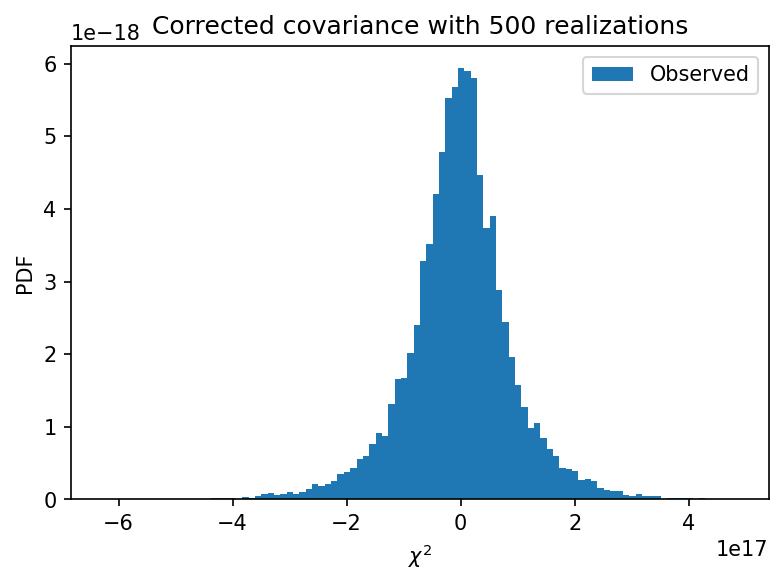

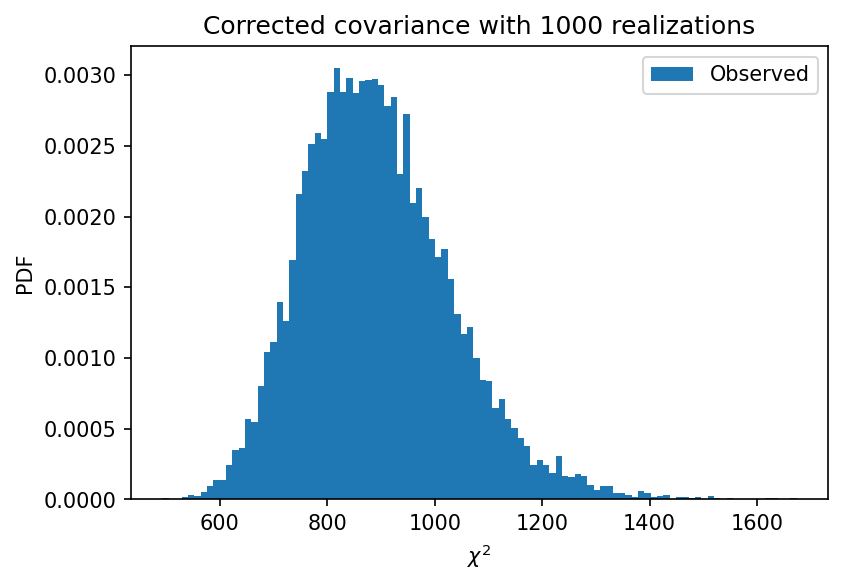

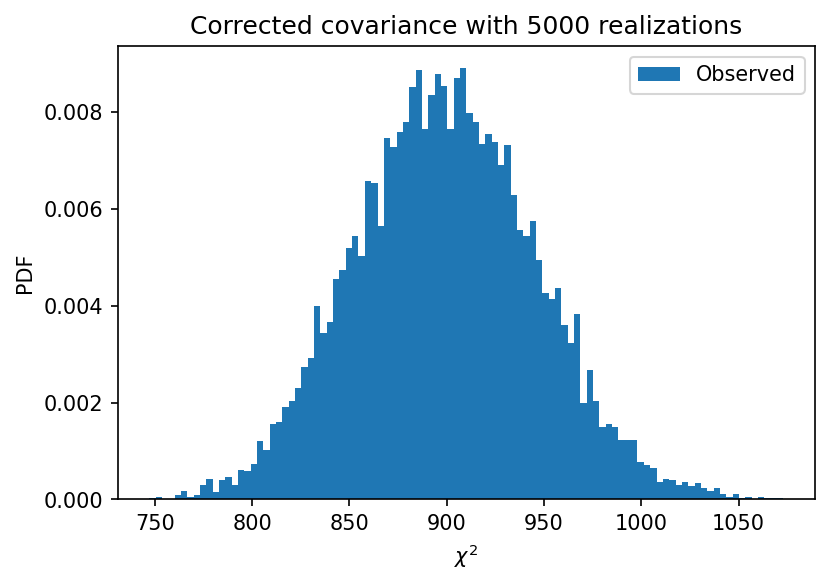

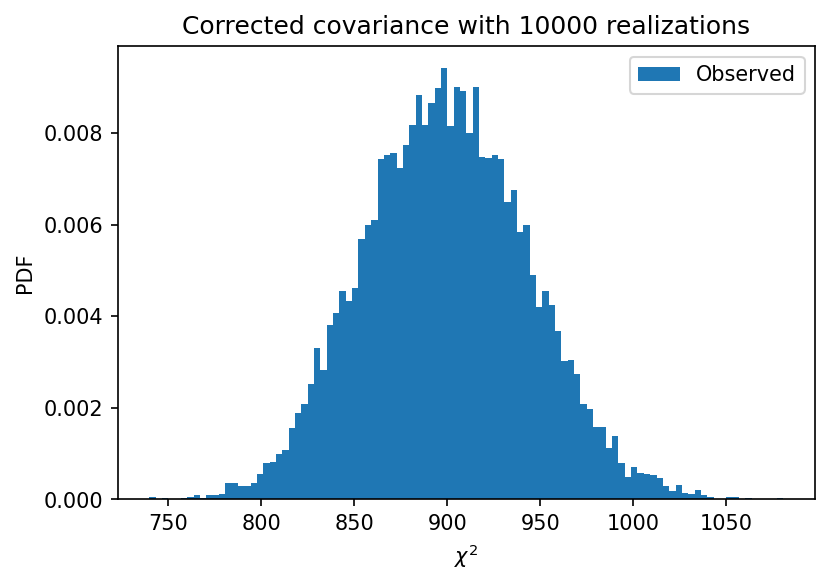

In [9]:
# We apply the Hartlap correction factor to each and recompute the mean and variance to see if they agree now.

inv_cov = inv(cov_num500)
n_r = 500
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 500 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 500 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 500 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num1000)
n_r = 1000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 1000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num5000)
n_r = 5000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 5000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num10000)
n_r = 10000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set1[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 10000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.var(chi2), 1))

# We notice that in three cases of 1000, 5000 and 10000 realizations applying the correction factor successfully
# debiases the measurement to give the correct mean chi-squared value (this is not true for 500 realizations 
# though since there must be at least 900 realizations for the matrix to be guaranteed to be invertible); however,
# we also observe that the variances of the chi-squared values do NOT agree with a theoretical chi-squared 
# distribution (i.e. they are all larger than 1800); this is expected because even though the estimate of the 
# inverse covariance matrix is no longer biased it still has noise to the finite number of samples and this adds
# additional scatter to the computed chi-squared values above and beyond the analytical variance.

### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

Mean of chi-squared values using covariance with 500 realizations is:  -2974106773558590.0
Variance of chi-squared values using covariance with 500 realizations is:  8.470792781296693e+33 

Mean of chi-squared values using covariance with 1000 realizations is:  813.5
Variance of chi-squared values using covariance with 1000 realizations is:  74802.8 

Mean of chi-squared values using covariance with 5000 realizations is:  818.9
Variance of chi-squared values using covariance with 5000 realizations is:  8181.2 

Mean of chi-squared values using covariance with 10000 realizations is:  818.9
Variance of chi-squared values using covariance with 10000 realizations is:  1360.9


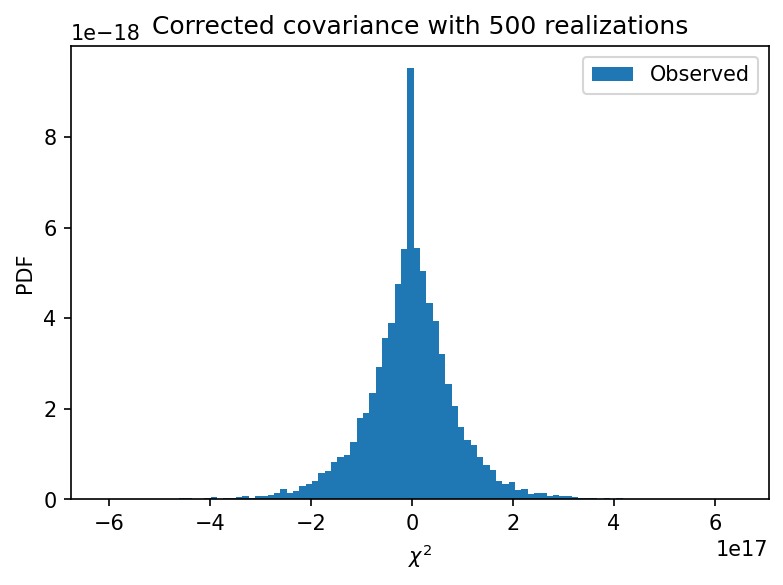

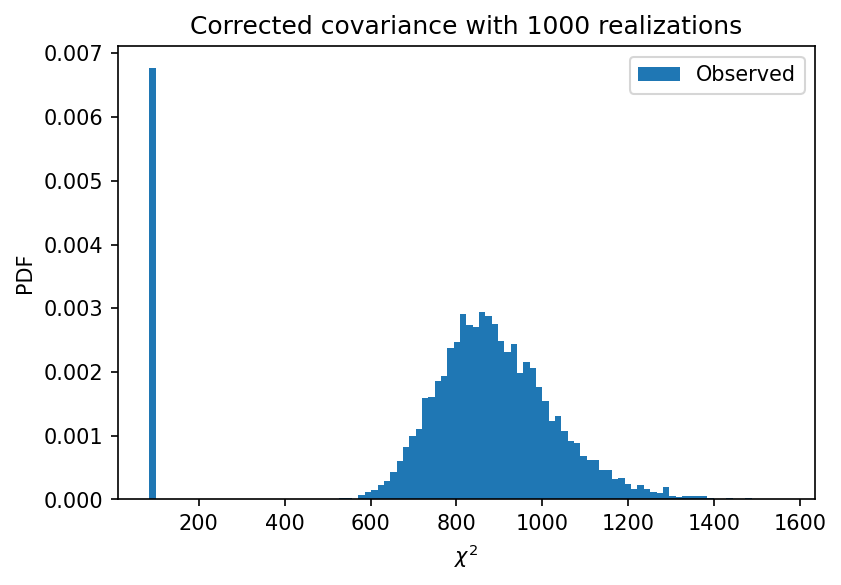

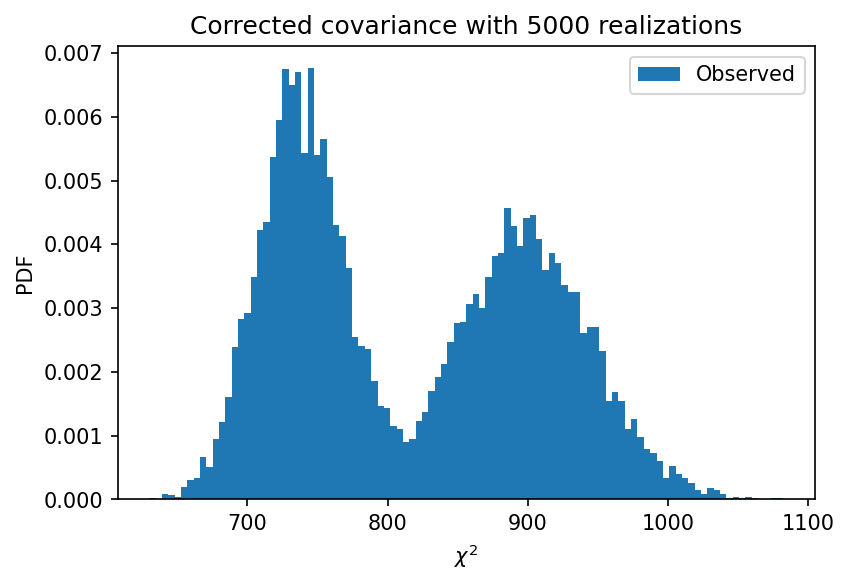

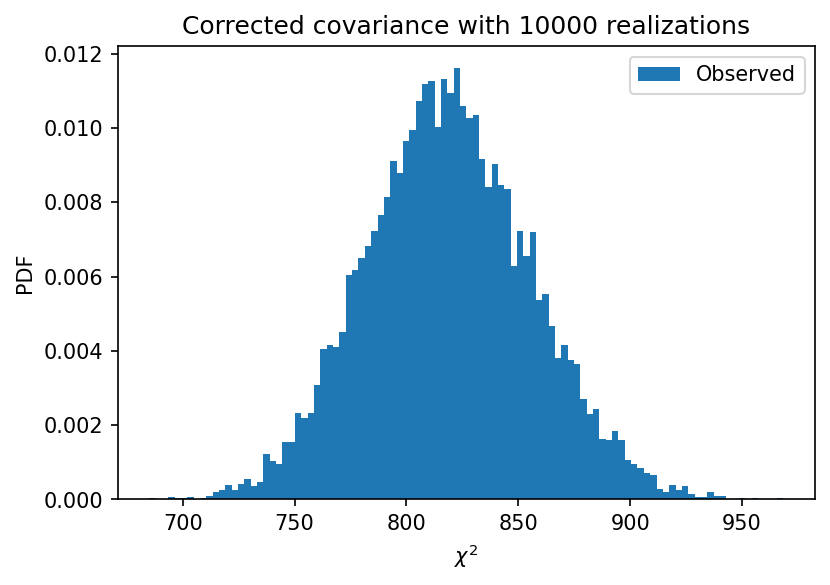

In [10]:
# We now repeat task 5 again but this time using set 2 vectors instead of set 1.

inv_cov = inv(cov_num500)
n_r = 500
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set2[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 500 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 500 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 500 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num1000)
n_r = 1000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set2[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 1000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 1000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num5000)
n_r = 5000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set2[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 5000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 5000 realizations is: ', 
      round(np.var(chi2), 1), '\n')

inv_cov = inv(cov_num10000)
n_r = 10000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
for i in range(10000):
    diff = np.array([noisy_data_set2[i] - model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 10000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('Mean of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.mean(chi2), 1))
print('Variance of chi-squared values using covariance with 10000 realizations is: ', 
      round(np.var(chi2), 1))

# We notice that unlike task 5, the chi-squared values in set 2 do NOT have an unbiased mean chi-squared value
# (we can see that in the cases of 1000, 5000, 10000 realizations they are systematically lower than the expected
# value of 1800). We also note that the variances disagree with the theoretical values, as observed by histograms
# of the resulting chi-squared distributions in the four scenarios (the shapes are also highly irregular). This
# result can be explained by considering that set 2 is used to generate the covariance matrices themselves, so
# when measuring the chi-squared values for set 1 an independent set was used to generate the covariance matrix
# but in this not the case when measuring set 2 chi-squared values, this effect will skew the results.

### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

The mean of the sample is:  9092.3
The variance of the sample is:  1993735.0


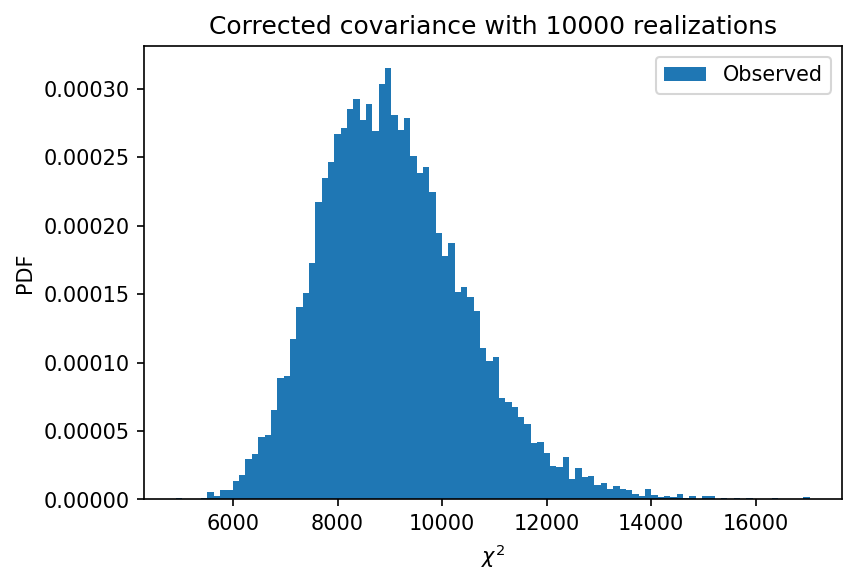

In [11]:
noisy_data_set3 = np.random.multivariate_normal(mean=model, cov=cov_num1000, size=10000)
cov_num10000_set3 = np.cov(noisy_data_set3.T)
inv_cov = inv(cov_num10000_set3)
n_r = 10000
n_d = len(model)
h = (n_r-1)/(n_r-n_d-2)
inv_cov /= h
chi2 = []
# We compute the chi^2 for all data vectors in set 1 according to the newly created covariance matrix from set 3
# which itself is generated from one of the numerical covariance matrices from set 2
for i in range(10000):
    diff = np.array([noisy_data_set1[i]-model]).T
    chi2.append(np.matmul(np.matmul(diff.T, inv_cov), diff)[0][0])
fig, ax = plt.subplots(dpi=150)
ax.hist(chi2, bins=100, density=True, label='Observed')
ax.set_title('Corrected covariance with 10000 realizations')
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel('PDF')
ax.legend()
print('The mean of the sample is: ', round(np.mean(chi2), 1))
print('The variance of the sample is: ', round(np.var(chi2), 1))

# We notice that even after applying the Hartlap correction to account for having only 10000 realizations, the 
# resulting distribution does NOT match the theoretical chi-squared distribution. This observation makes 
# intuitive sense considering that we are using the numerical covariance matrix (which itself is based on finite 
# samples and thus is subject to noise and bias when taking the inverse) to generate the samples that make up 
# the test set 3 covariance matrix. No matter how many samples we draw for set 3, we can not reduce the noise 
# using this method because there will still be the underlying noise in the 1000 realizations covariance matrix 
# used to generate the set 3. In order to debias the mean chi-squared value, we would have to apply a Hartlap 
# correction factor to the numerical covariance matrix with 1000 realizations (in addition to the correction for 
# the 10000 realizations in set 3). Having finite number of samples for set 3 can further increase the variance 
# above and beyond what is already present but no matter how many samples are drawn for set 3 we will not be 
# able to reproduce the variance found when using the analytical covariance matrix.

### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 

In [12]:
# The minimum number of data vectors such that the covariance matrix is non-singular is 901. This is based on the 
# requirement that the denominator of the Hartlap correction term is non negative. This can also be tested by 
# identifying whether the computed covariance matrix has strictly positive eigenvalues. I have tested this
# explicitly and found that only for 901 or more data vectors, the resulting covariance matrix has strictly
# positive eigenvalues and thus is invertible. If the covariance matrix is not invertible, we can use a 
# SINGULAR VALUE DECOMPOSITION to obtain a pseudo inverse.